In [11]:
import pickle
#import seaborn as sns

xxToPlot = pickle.load( open( "ciOutput.p", "rb" ) )

print(len(xxToPlot))

print(len(xxToPlot)/40640)


23408640
576.0


In [12]:
len(xxToPlot)

23408640

In [13]:
import bisect 
import numpy as np
from scipy.stats import mstats 
%matplotlib inline
from matplotlib import pyplot as plt

# plot with matplotlib
#plt.plot( 'pred', 'actual', data=xxToPlot, marker='o', color='mediumvioletred')




In [14]:
plot_data = []

j=0
#576
for i in range(0,576):
    #xxToPlot[i*40640:i*40640+40640]
    #print(i*40640+40640)
    xx = xxToPlot[i*40640:i*40640+40640].sort_values(by=['pred'])
    plot_data.append({ 
    'thresholds': xx['pred'].values
        , 'precision': xx['actual'].values}) 

In [8]:
# plot_data.append({ 
#     'thresholds': xxToPlot['pred'].values
#   , 'precision': xxToPlot['actual'].values
# }) 

In [15]:
import bisect 
import numpy as np
from scipy.stats import mstats 
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
uniform_thresholds = np.linspace(0.1, .07,101) 
uniform_precision_plots = []


In [24]:
bisect.bisect_left(plot_data[15]['thresholds'], uniform_thresholds[100])

36163

In [20]:
plot_data[8]

{'thresholds': array([0.03751347, 0.03751963, 0.03752567, ..., 0.16051409, 0.16957597,
        0.17793143]),
 'precision': array([0.03962589, 0.03962944, 0.03964976, ..., 0.22476272, 0.22426603,
        0.21433934])}

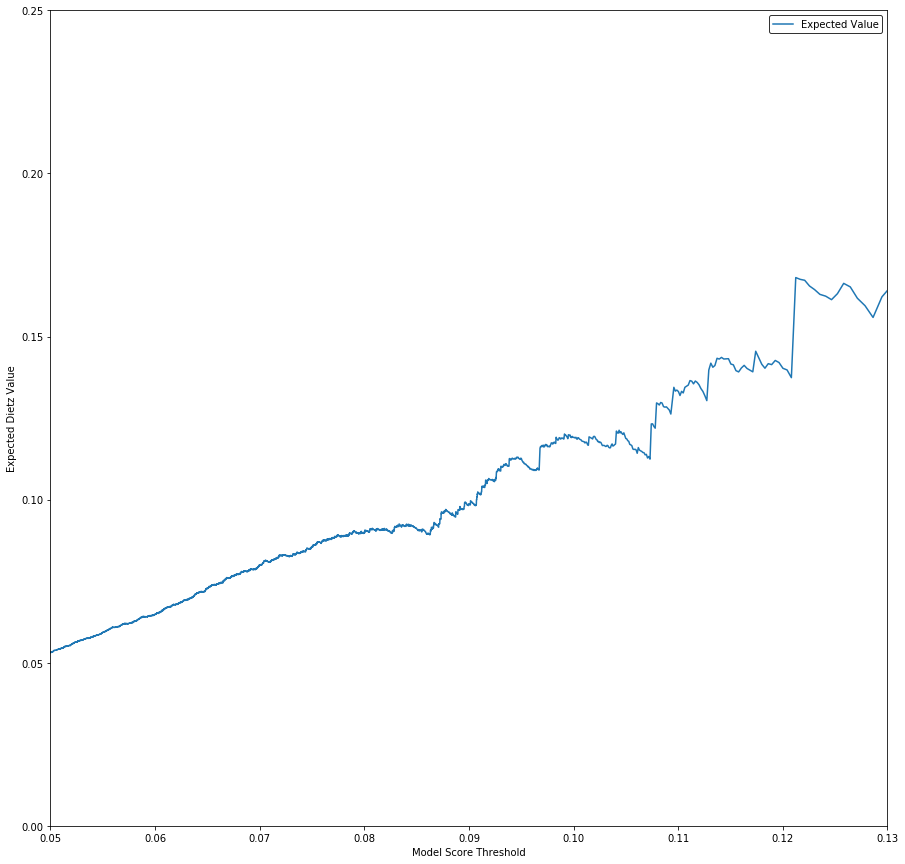

In [25]:
import random
r=8#random.randint(1,500)

plt.plot(plot_data[r]['thresholds'], plot_data[r]['precision'], color=sns.color_palette()[0], alpha=1) 

leg = plt.legend(('Expected Value', 'recall', 'queue_rate'), 
frameon=True) 
leg.get_frame().set_edgecolor('k')

plt.xlabel('Model Score Threshold') 
plt.ylabel('Expected Dietz Value')
plt.ylim((0, 0.25))
plt.xlim((0.05, 0.13))
plt.rcParams['figure.figsize'] = [15, 15]

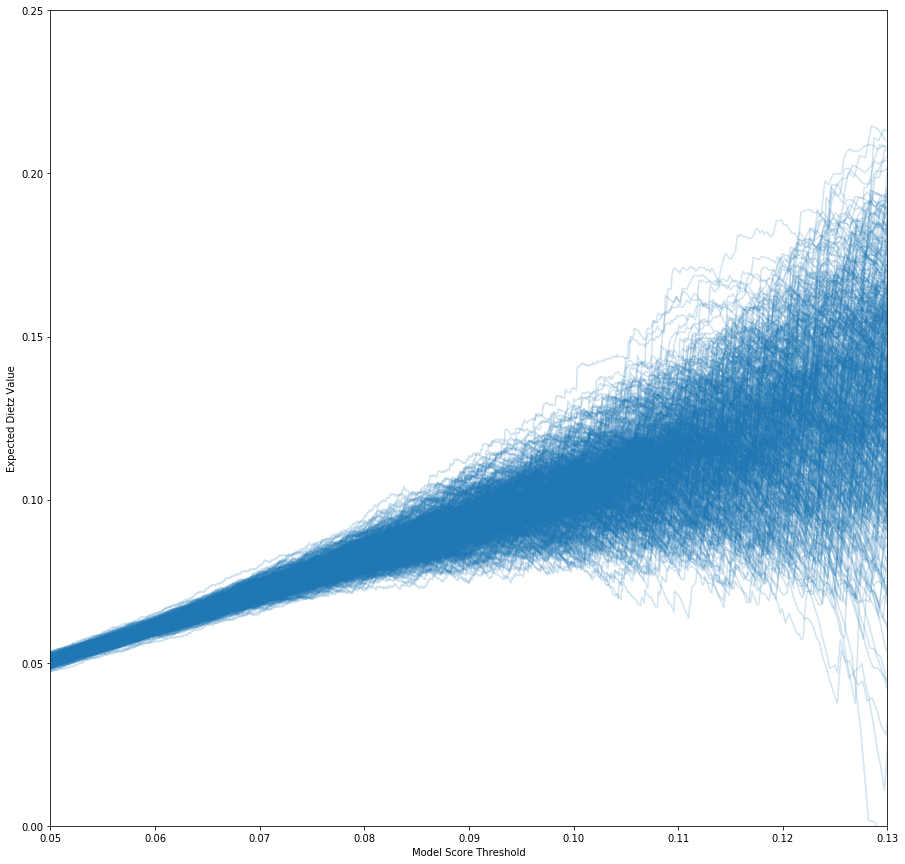

In [10]:
for p in plot_data: 
    plt.plot(p['thresholds'], p['precision'], color=sns.color_palette()[0], alpha=0.2) 
    


plt.xlabel('Model Score Threshold')
plt.ylabel('Expected Dietz Value')
plt.ylim((0, 0.25))
plt.xlim((0.05, 0.13))
plt.rcParams['figure.figsize'] = [15, 15]

In [13]:
uniform_thresholds = np.linspace(0.05, .137, 500) 


In [26]:


uniform_precision_plots = [] 

for p in plot_data: 
    uniform_precision = [] 
    for ut in uniform_thresholds: 
        #
        index = bisect.bisect_left(p['thresholds'], ut) 
        uniform_precision.append(p['precision'][index]) 
        #print(p['precision'][index])
    uniform_precision_plots.append(uniform_precision) 




Text(0,0.5,'Expected Dietz Value')

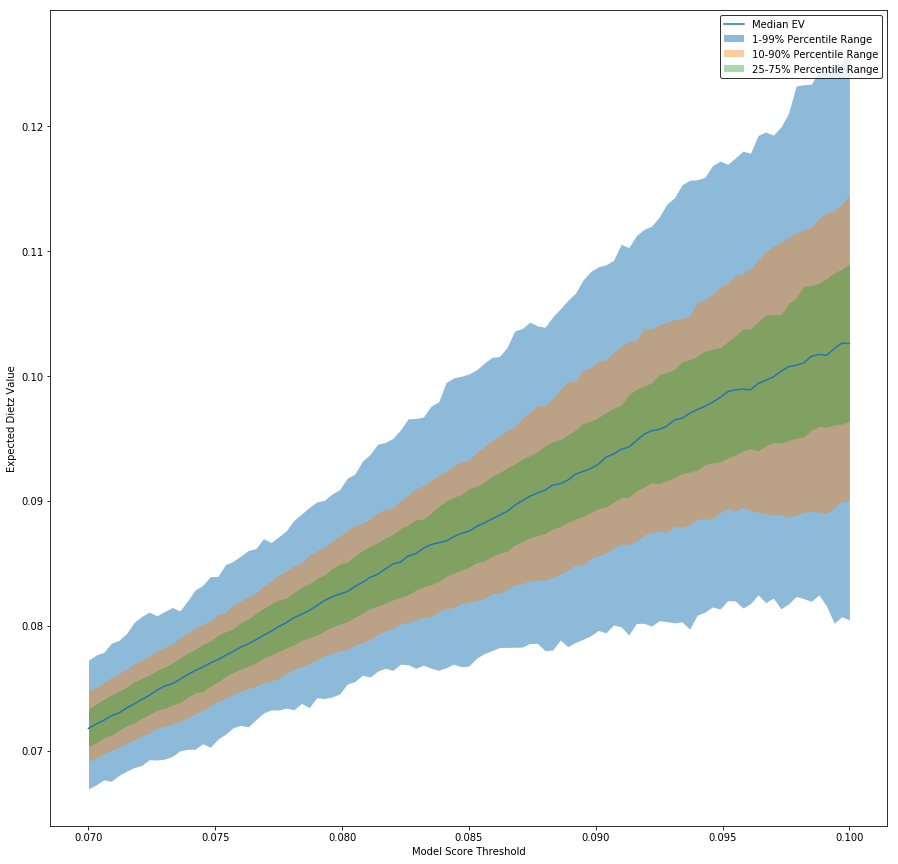

In [27]:
quantiles = [0.01, 0.5, 0.99] 
lower_precision, median_precision, upper_precision = mstats.mquantiles(uniform_precision_plots, quantiles, axis=0) 

quantiles2 = [0.1, 0.5, 0.90] 
lower_precision2, median_precision2, upper_precision2 = mstats.mquantiles(uniform_precision_plots, quantiles2, axis=0) 

quantiles3 = [0.25, 0.5, 0.75] 
lower_precision3, median_precision3, upper_precision3 = mstats.mquantiles(uniform_precision_plots, quantiles3, axis=0) 


plt.plot(uniform_thresholds, median_precision) 

plt.fill_between(uniform_thresholds, upper_precision, lower_precision, alpha=0.5, linewidth=0, color=sns.color_palette()[0]) 
plt.fill_between(uniform_thresholds, upper_precision2, lower_precision2, alpha=0.4, linewidth=0, color=sns.color_palette()[1]) 
plt.fill_between(uniform_thresholds, upper_precision3, lower_precision3, alpha=0.4, linewidth=0, color=sns.color_palette()[2]) 

leg = plt.legend(('Median EV', '1-99% Percentile Range', '10-90% Percentile Range', '25-75% Percentile Range'), 
frameon=True) 
leg.get_frame().set_edgecolor('k')

plt.xlabel('Model Score Threshold')
plt.ylabel('Expected Dietz Value')